# LHC Luminosities
<hr style="border-top-width: 4px; border-top-color: #34609b;">
Extract live data from the [LHC](http://home.cern/topics/large-hadron-collider) and create interactive plots with [pytimber](https://github.com/rdemaria/pytimber).


## Preparation
A small *workaround* is still necessary before the central installation of PyTimber is released in LCG85_SWAN2. This cell will not be necessary very soon.

In [1]:
!pip install --user --process-dependency-links https://github.com/rdemaria/pytimber/archive/v2.2.0.zip

    100% |████████████████████████████████| 122kB 407kB/s 
  DEPRECATION: Dependency Links processing has been deprecated and will be removed in a future release.
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Let's import all the Python modules necessary for this study and tell matplotlib to generate interactive javascript plots.

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import time

import pytimber
# this code will not be needed very soon
import os
os.environ["JAVA_JVM_LIB"]="/cvmfs/sft.cern.ch/lcg/releases/java/8u91-ae32f/x86_64-slc6-gcc49-dbg/jre/lib/amd64/server/libjvm.so"

#connect to the database
db=pytimber.LoggingDB()

#Please ignore following warning, it will disappear with the next software release

/cvmfs/sft.cern.ch/lcg/views/LCG_84swan4/x86_64-slc6-gcc49-opt/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Retrieve the data from the logging database
We are now ready to open a connection to the logging database with [pytimber](https://github.com/rdemaria/pytimber) and extract for the past 24 hours:
- The experiment luminosities

In [3]:
now=time.time()
now_minus_a_day = now - 3600*24
alice='ALICE:LUMI_TOT_INST'
atlas='ATLAS:LUMI_TOT_INST'
cms='CMS:LUMI_TOT_INST'
lhcb='LHCB:LUMI_TOT_INST'
data=db.get([alice,atlas,cms,lhcb],now_minus_a_day,now)

## Plotting the data
We can now build a plot of the intensity and beams energy starting from the data we retrieved. The [matplotlib](https://matplotlib.org) library can be used for creating interactive javascript based data visualisations.

<IPython.core.display.Javascript object>


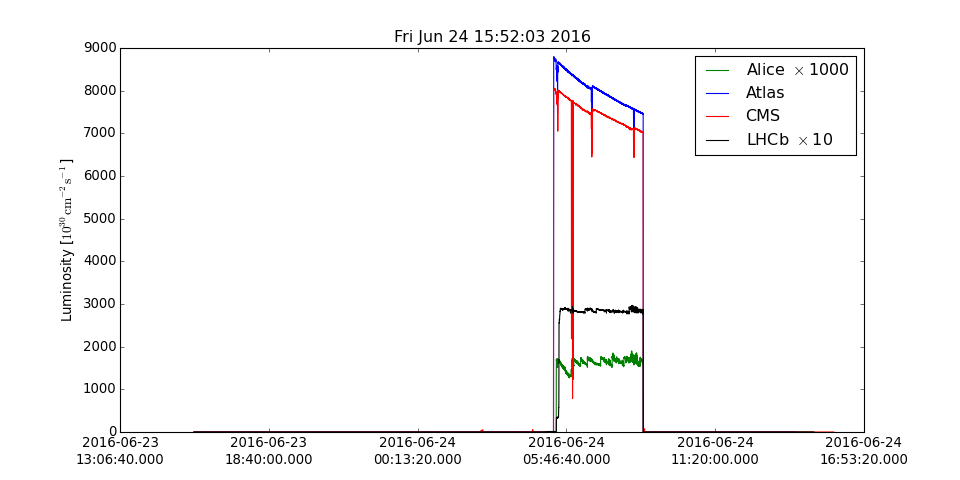

In [4]:
plt.figure(figsize=(12,6))
tt,vv=data[alice]
plt.plot(tt,1000*vv,'-g',label=r'Alice $\times$ 1000')
tt,vv=data[atlas]
plt.plot(tt,vv,'-b',label='Atlas')
tt,vv=data[cms]
plt.plot(tt,vv,'-r',label='CMS')
plt.ylabel(r'Luminosity [$10^{30} \rm cm^{-2} s^{-1}$]')
tt,vv=data[lhcb]
plt.plot(tt,10*vv,'-k',label=r'LHCb $\times$ 10')
plt.ylabel(r'Luminosity [$10^{30} \rm cm^{-2}  s^{-1}$]')
plt.legend()
plt.title(time.asctime(time.localtime(now)))
pytimber.set_xaxis_date()